In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import joblib


In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
 df['target']=data.target

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df['target_names'] = df['target'].map({i:name for i,name in enumerate(data.target_names)})

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

In [15]:
df['target_names'].value_counts()

target_names
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Binary  Class Classification

In [16]:
binary_df=df[df['target']!=2]

In [17]:
binary_df['target_names'].value_counts()

target_names
setosa        50
versicolor    50
Name: count, dtype: int64

In [18]:
x_binary=binary_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [19]:
y_binary=binary_df['target']

In [20]:
x_binary_train,x_binary_test,y_binary_train,y_binary_test = train_test_split(x_binary,y_binary,test_size=0.2)

In [21]:
x_binary_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
79,5.7,2.6,3.5,1.0
24,4.8,3.4,1.9,0.2
69,5.6,2.5,3.9,1.1
10,5.4,3.7,1.5,0.2
...,...,...,...,...
70,5.9,3.2,4.8,1.8
91,6.1,3.0,4.6,1.4
27,5.2,3.5,1.5,0.2
75,6.6,3.0,4.4,1.4


In [22]:
x_binary_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,80.000000,80.000000,80.000000,80.000000
mean,5.442500,3.108750,2.820000,0.775000
std,0.627992,0.488395,1.443045,0.566468
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.475000,0.200000
50%,5.450000,3.000000,1.900000,0.550000
75%,5.800000,3.400000,4.200000,1.300000
max,6.800000,4.400000,5.100000,1.800000


In [24]:
le=LabelEncoder()

In [25]:
y_binary_train_encoded = le.fit_transform(y_binary_train)

In [26]:
scaler = StandardScaler()
x_binary_train_standard = scaler.fit_transform(x_binary_train)
x_binary_test_standard = scaler.fit_transform(x_binary_test)



In [27]:
x_binary_test_standard

array([[-0.27150891,  1.92506684, -0.90535482, -0.77093622],
       [ 1.04934523, -1.74172714,  0.93951915,  0.84265122],
       [ 0.60906052, -0.3666794 ,  1.00784782,  1.2012262 ],
       [ 1.34286837, -0.59585402,  1.07617648,  1.2012262 ],
       [-1.2988399 ,  0.32084447, -0.97368348, -1.12951121],
       [-0.12474733, -1.51255252,  0.46121849,  0.30478874],
       [ 1.92991465,  0.09166985,  1.28116248,  1.2012262 ],
       [-0.71179362,  0.77919372, -1.04201215, -1.12951121],
       [-0.85855519,  0.32084447, -1.24699815, -1.12951121],
       [-1.00531676,  0.09166985, -1.04201215, -1.3087987 ],
       [ 2.07667622,  0.32084447,  1.14450515,  1.02193871],
       [-0.71179362,  1.00836835, -1.11034082, -1.12951121],
       [-0.85855519,  1.00836835, -1.17866948, -0.95022371],
       [-0.12474733, -1.05420327,  0.93951915,  0.66336372],
       [-0.41827048,  1.4667176 , -1.04201215, -1.12951121],
       [ 0.75582209, -0.3666794 ,  1.14450515,  1.02193871],
       [-1.00531676, -1.

In [28]:
model1 = SVC(kernel='linear',C=0.1,probability=True)
model1.fit(x_binary_train_standard,y_binary_train_encoded)

SVC(C=0.1, kernel='linear', probability=True)

In [29]:
model1.predict(x_binary_test_standard)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [30]:
print("Binary Class Classification report:\n" , classification_report(y_binary_test, model1.predict(x_binary_test_standard)))

Binary Class Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [31]:
confusion_matrix(y_binary_test,model1.predict(x_binary_test_standard))

array([[ 9,  0],
       [ 0, 11]])

In [32]:
joblib.dump(model1,"SVM_Binary.pkl")

['SVM_Binary.pkl']

Multiclass Classification


In [34]:
x_multi=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [35]:
y_multi=df['target']

In [36]:
x_train_multi,x_test_multi,y_train_multi,y_test_multi = train_test_split(x_multi, y_multi,test_size=0.2)

In [37]:
model_multi = SVC(kernel='linear')

In [38]:
model_multi.fit(x_train_multi,y_train_multi)

SVC(kernel='linear')

In [40]:
prediction = model_multi.predict(x_test_multi)

In [44]:
print("Multi Class Classifiaction report: \n" ,classification_report(y_test_multi,prediction))

Multi Class Classifiaction report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [46]:
confusion_matrix(y_test_multi,prediction)

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]])

In [45]:
joblib.dump(model_multi,"Multiclass_classification.pkl")

['Multiclass_classification.pkl']

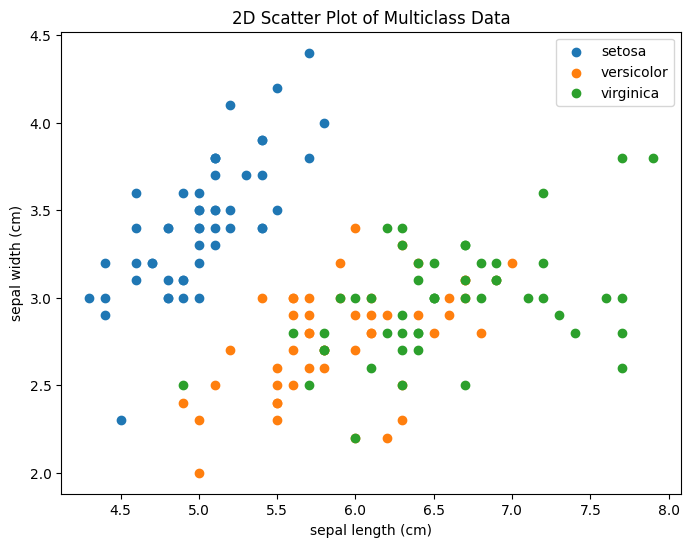

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load multiclass data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Plot first two features
plt.figure(figsize=(8, 6))
for label in df['target'].unique():
    plt.scatter(
        df[df['target'] == label].iloc[:, 0],
        df[df['target'] == label].iloc[:, 1],
        label=iris.target_names[label]
    )
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title("2D Scatter Plot of Multiclass Data")
plt.show()


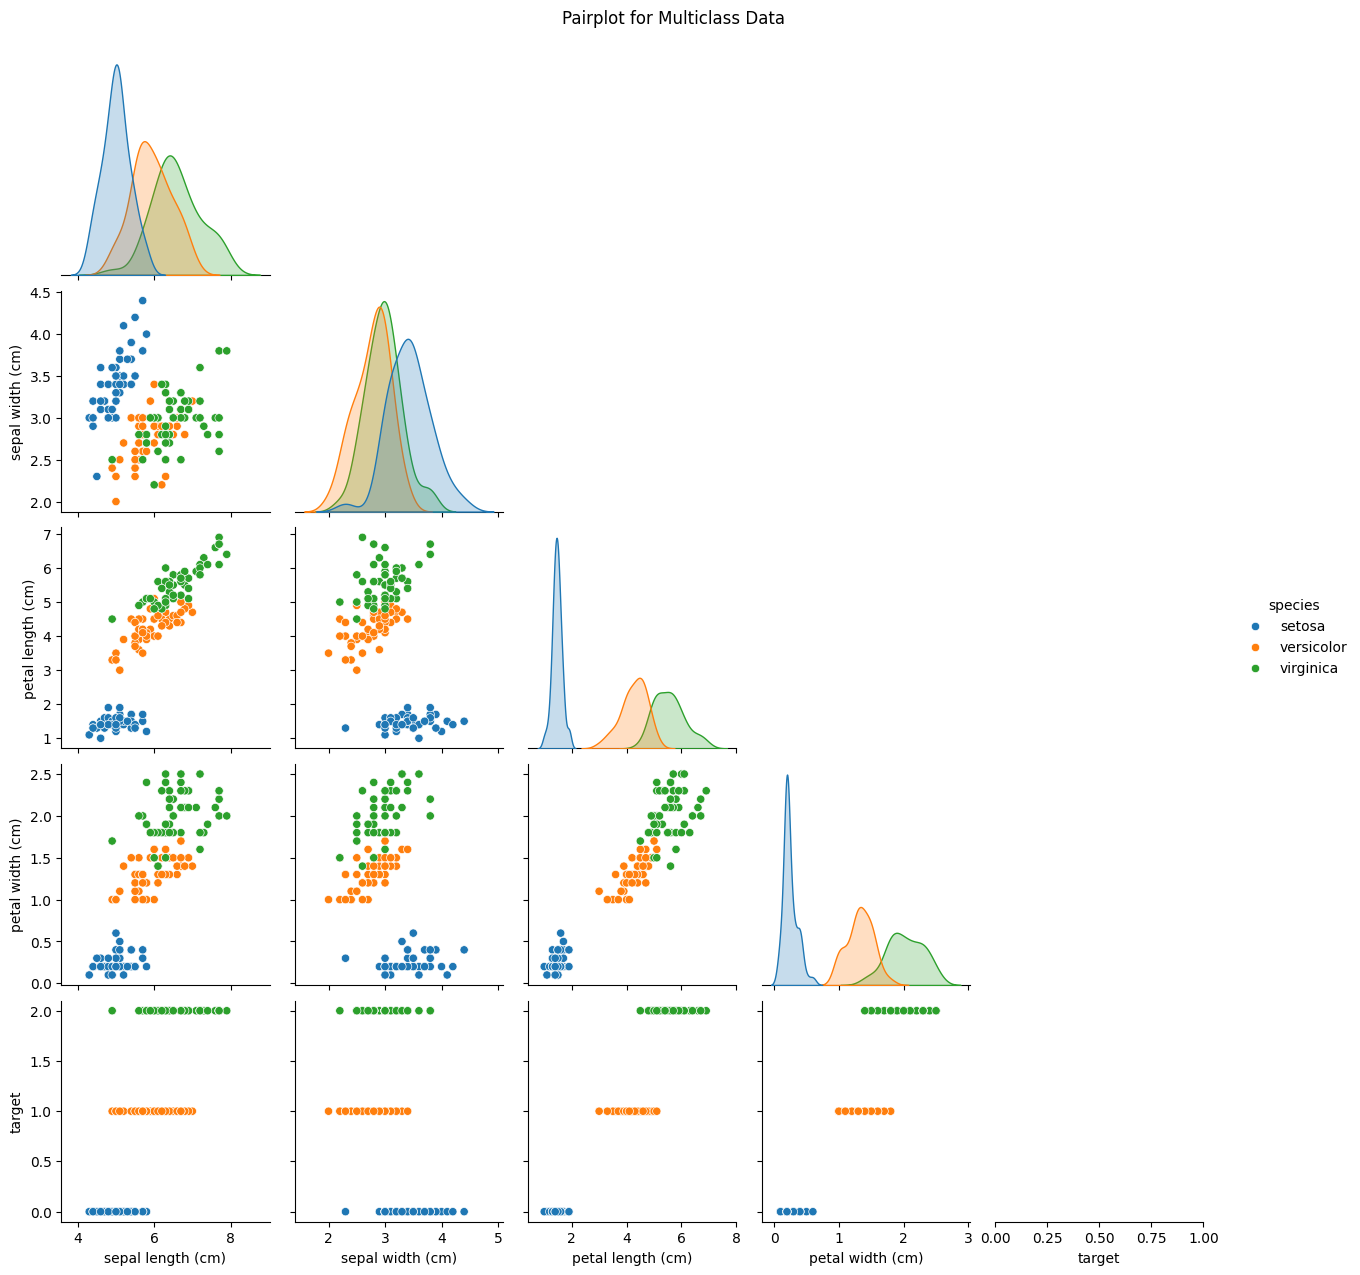

In [48]:
import seaborn as sns

df['species'] = df['target'].apply(lambda x: iris.target_names[x])
sns.pairplot(df, hue='species', corner=True)
plt.suptitle("Pairplot for Multiclass Data", y=1.02)
plt.show()


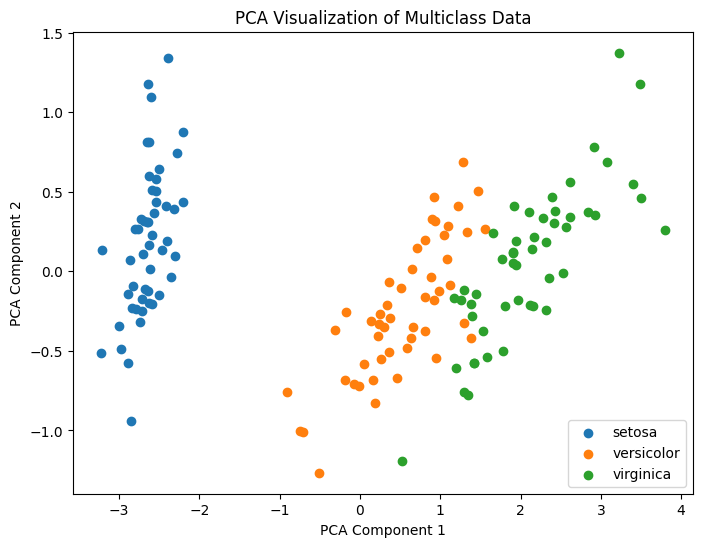

In [49]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
reduced = pca.fit_transform(iris.data)

plt.figure(figsize=(8, 6))
for label in range(len(iris.target_names)):
    plt.scatter(
        reduced[iris.target == label, 0],
        reduced[iris.target == label, 1],
        label=iris.target_names[label]
    )
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.title("PCA Visualization of Multiclass Data")
plt.show()


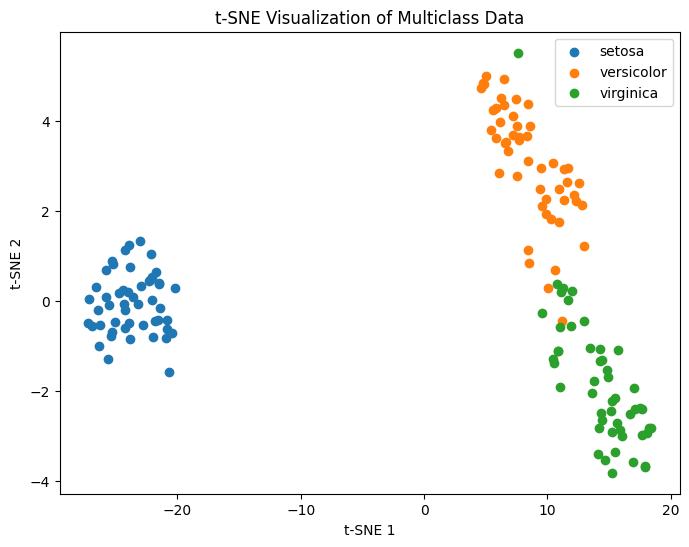

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(iris.data)

plt.figure(figsize=(8, 6))
for label in range(len(iris.target_names)):
    plt.scatter(
        tsne_result[iris.target == label, 0],
        tsne_result[iris.target == label, 1],
        label=iris.target_names[label]
    )
plt.title("t-SNE Visualization of Multiclass Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


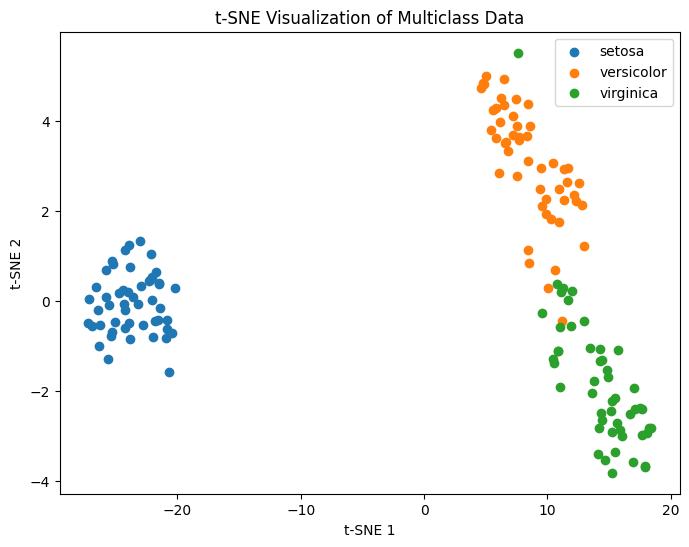

In [51]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(iris.data)

plt.figure(figsize=(8, 6))
for label in range(len(iris.target_names)):
    plt.scatter(
        tsne_result[iris.target == label, 0],
        tsne_result[iris.target == label, 1],
        label=iris.target_names[label]
    )
plt.title("t-SNE Visualization of Multiclass Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()
